# Spotify Tracks EDA: What Makes a Song Popular? (114k+ Songs)

**Dataset**: [Spotify Tracks Dataset](https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset) (~114,000 tracks with audio features)
**Author**: Disha Asher – College Student | Kaggle Certified (Python, Pandas, Data Visualization, Intro ML)
**Date**: December 2025

### Project Overview
This notebook dives into Spotify's audio features to uncover patterns behind popular music:

**Key Questions**:
- Which genres dominate the dataset?
- How do audio features (danceability, energy, valence, loudness, etc.) differ across genres?
- What characteristics do the most popular tracks share?
- Can we spot "hit" signatures in the data?

**Features Explored**:
- Danceability, Energy, Valence (mood), Loudness, Tempo, Acousticness, Instrumentalness, etc.
- Popularity score (0-100)
- Genres, artists, track duration

**Tools Used**: Pandas, Matplotlib, Seaborn, Plotly
**Note**: Dataset contains synthetic/random elements — insights focus on aggregated trends.

**Ethical Credit**: Code optimization, visualization enhancements, and debugging assisted by AI. All analysis and interpretations are my own.

Let the music play! 🎧📊

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# df = pd.read_csv('/kaggle/input/-spotify-tracks-dataset/dataset.csv')  #loading dataset
dataset_path = os.path.join('datasets', 'dataset2.csv')
df = pd.read_csv(dataset_path)

print("Shape:", df.shape)
print("\nColumns:")
print(df.columns.tolist())
print("\nFirst 5 rows:")
display(df.head())

print("\nInfo:")
df.info()

print("\nMissing values:")
print(df.isnull().sum())

print("\nBasic stats:")
display(df.describe())

Shape: (114000, 21)

Columns:
['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre']

First 5 rows:


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness     

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [3]:
#This handles duplicates, missing values (e.g., 'track_genre' has some NaNs), and adds useful columns like total audio features score
# Step 2: Clean the Data
df = df.copy()

# Drop duplicates (based on track_id)
df = df.drop_duplicates(subset=['track_id'], keep='first')

# Fill missing genres (common in this dataset — use 'Unknown' or drop)
df['track_genre'] = df['track_genre'].fillna('Unknown')

# Convert duration to minutes for easier reading
df['duration_min'] = df['duration_ms'] / 60000  # ms to minutes

# Create a 'Hit Score' (simple combo of popularity + audio features for insights)
audio_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 
                  'instrumentalness', 'liveness', 'valence']
df['hit_score'] = df['popularity'] + df[audio_features].mean(axis=1) * 10  # Scale features to match popularity range

# Quick check after cleaning
print("Cleaned Shape:", df.shape)
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())
print("\nSample Audio Features Stats:")
print(df[audio_features + ['popularity']].describe())

Cleaned Shape: (89741, 23)

Missing Values After Cleaning:
Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
duration_min        0
hit_score           0
dtype: int64

Sample Audio Features Stats:
       danceability        energy      loudness   speechiness  acousticness  \
count  89741.000000  89741.000000  89741.000000  89741.000000  89741.000000   
mean       0.562166      0.634458     -8.499004      0.087442      0.328289   
std        0.176691      0.256605      5.221490      0.113277      0.338321   
min        0.000000      0.000000    -49.531000      0.000000      0.000000 

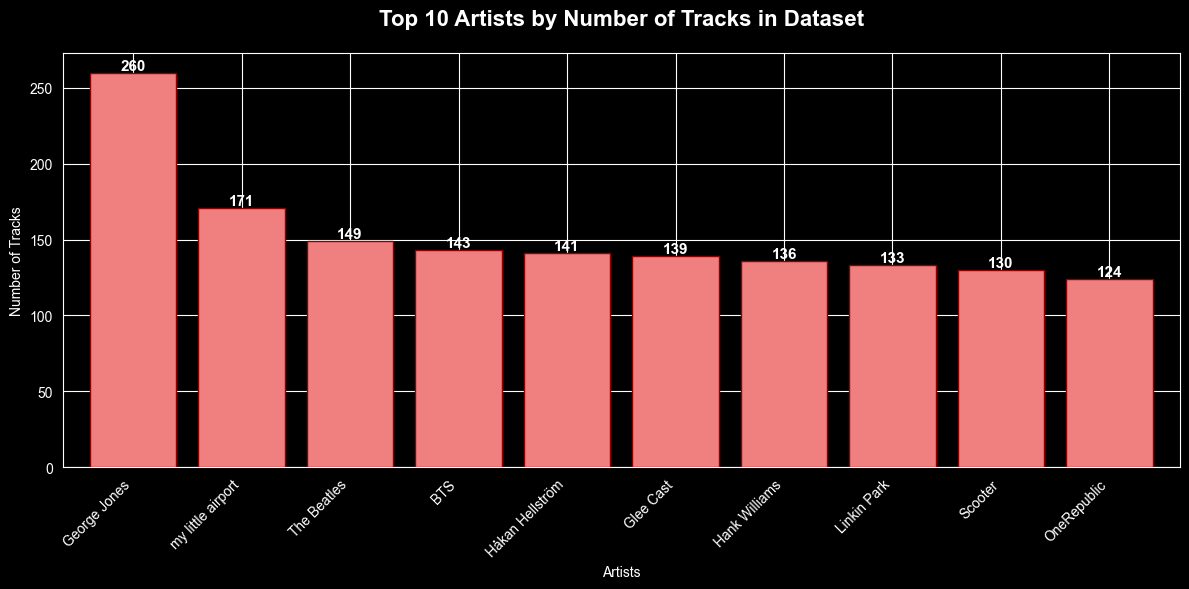

Total unique artists: 31437


In [4]:
# Top 10 Artists by Number of Tracks
top_artists = df['artists'].value_counts().head(10)

plt.figure(figsize=(12, 6))
top_artists.plot(kind='bar', color='lightcoral', edgecolor='darkred', width=0.8)
plt.title('Top 10 Artists by Number of Tracks in Dataset', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Artists')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(top_artists):
    plt.text(i, v + 2, str(v), ha='center', fontsize=11, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"Total unique artists: {df['artists'].nunique()}")

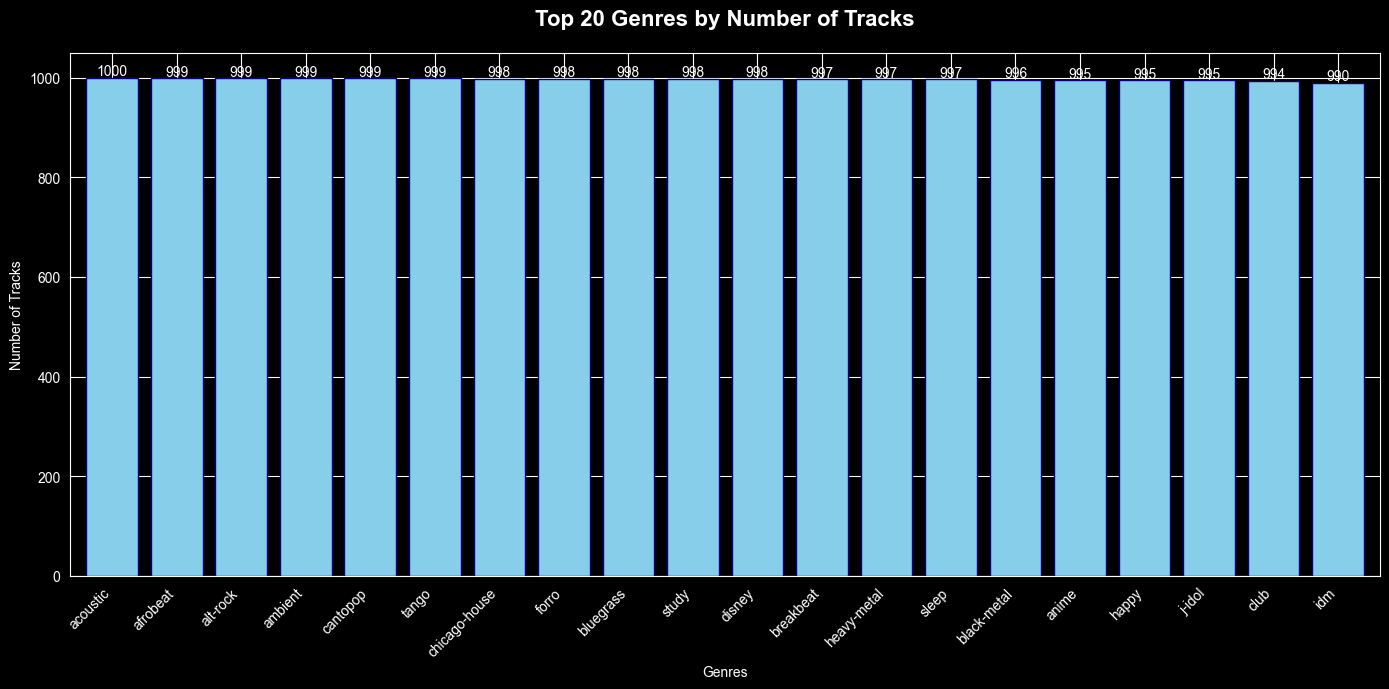

Total unique genres: 113


In [5]:
# Top 20 Genres by Number of Tracks
top_genres = df['track_genre'].value_counts().head(20)

plt.figure(figsize=(14, 7))
top_genres.plot(kind='bar', color='skyblue', edgecolor='navy', width=0.8)
plt.title('Top 20 Genres by Number of Tracks', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Genres')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(top_genres):
    plt.text(i, v + 5, str(v), ha='center', fontsize=10)
plt.tight_layout()
plt.show()

print(f"Total unique genres: {df['track_genre'].nunique()}")

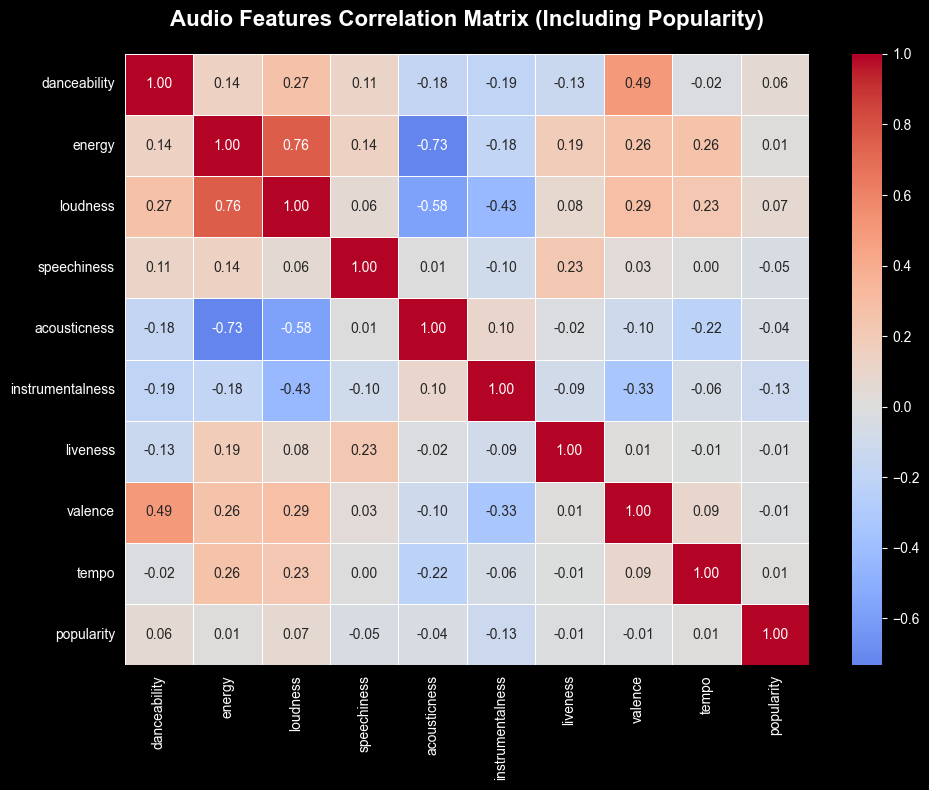

Key Correlations with Popularity:
popularity          1.000
loudness            0.072
danceability        0.064
energy              0.014
tempo               0.007
valence            -0.012
liveness           -0.014
acousticness       -0.039
speechiness        -0.047
instrumentalness   -0.127
Name: popularity, dtype: float64


In [6]:
# Correlation Heatmap: Audio Features & Popularity
audio_cols = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 
              'instrumentalness', 'liveness', 'valence', 'tempo', 'popularity']

corr = df[audio_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=0.5)
plt.title('Audio Features Correlation Matrix (Including Popularity)', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("Key Correlations with Popularity:")
print(corr['popularity'].sort_values(ascending=False).round(3))

<Figure size 1400x1000 with 0 Axes>

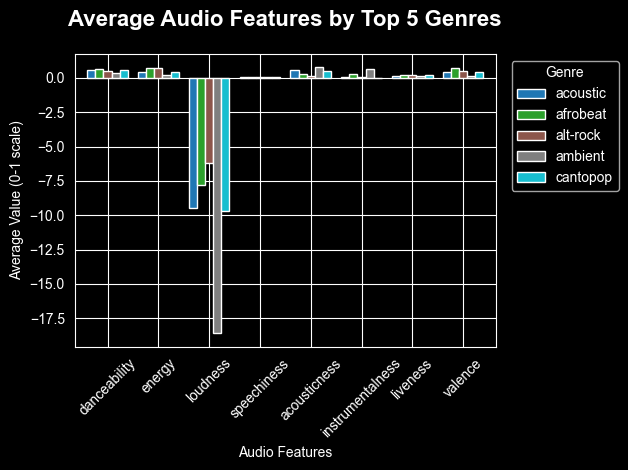

In [7]:
# Average Audio Features for Top 5 Genres
top5_genres = df['track_genre'].value_counts().head(5).index
genre_features = df[df['track_genre'].isin(top5_genres)].groupby('track_genre')[audio_features].mean()

plt.figure(figsize=(14, 10))
genre_features.T.plot(kind='bar', cmap='tab10', width=0.8)
plt.title('Average Audio Features by Top 5 Genres', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Average Value (0-1 scale)')
plt.xlabel('Audio Features')
plt.legend(title='Genre', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

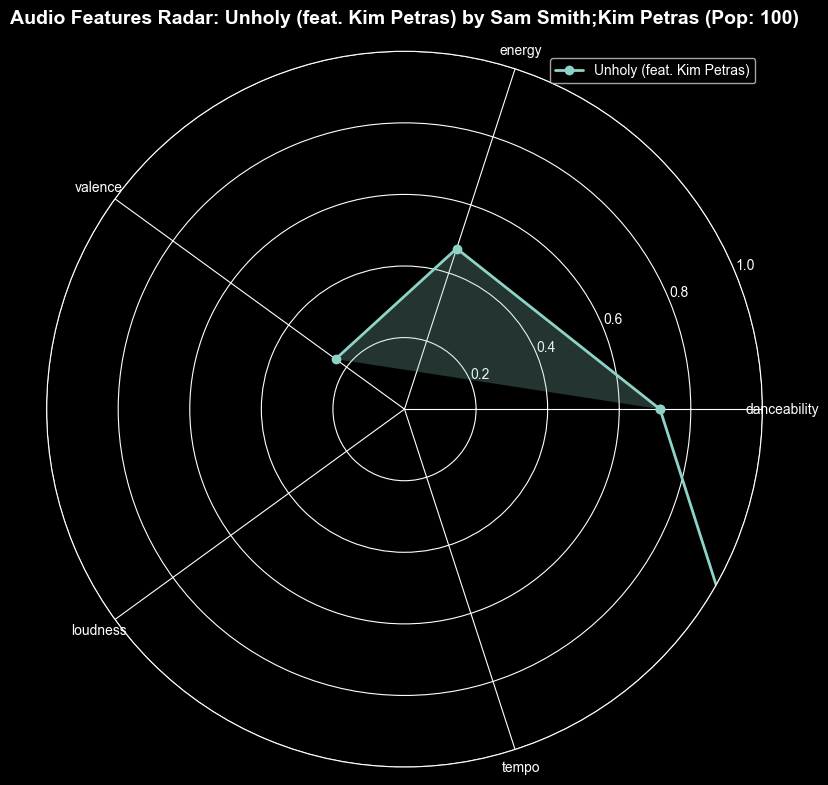

Top Track: Unholy (feat. Kim Petras) by Sam Smith;Kim Petras | Popularity: 100


In [8]:
# Radar Chart: Audio Features for a Top Track (e.g., highest popularity)
top_track = df.loc[df['popularity'].idxmax()]  # Get the most popular track
track_name = top_track['track_name']
artist = top_track['artists']

# Audio features for radar
radar_features = ['danceability', 'energy', 'valence', 'loudness', 'tempo']
values = [top_track[f] for f in radar_features]
values += values[:1]  # Close the polygon

angles = [n / float(len(radar_features)) * 2 * np.pi for n in range(len(radar_features))]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='polar'))
ax.plot(angles, values, 'o-', linewidth=2, label=track_name)
ax.fill(angles, values, alpha=0.25)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(radar_features)
ax.set_ylim(0, 1)
ax.set_title(f"Audio Features Radar: {track_name} by {artist} (Pop: {top_track['popularity']})", 
             fontsize=14, fontweight='bold', pad=20)
ax.legend(loc='upper right')
ax.grid(True)
plt.tight_layout()
plt.show()

print(f"Top Track: {track_name} by {artist} | Popularity: {top_track['popularity']}")

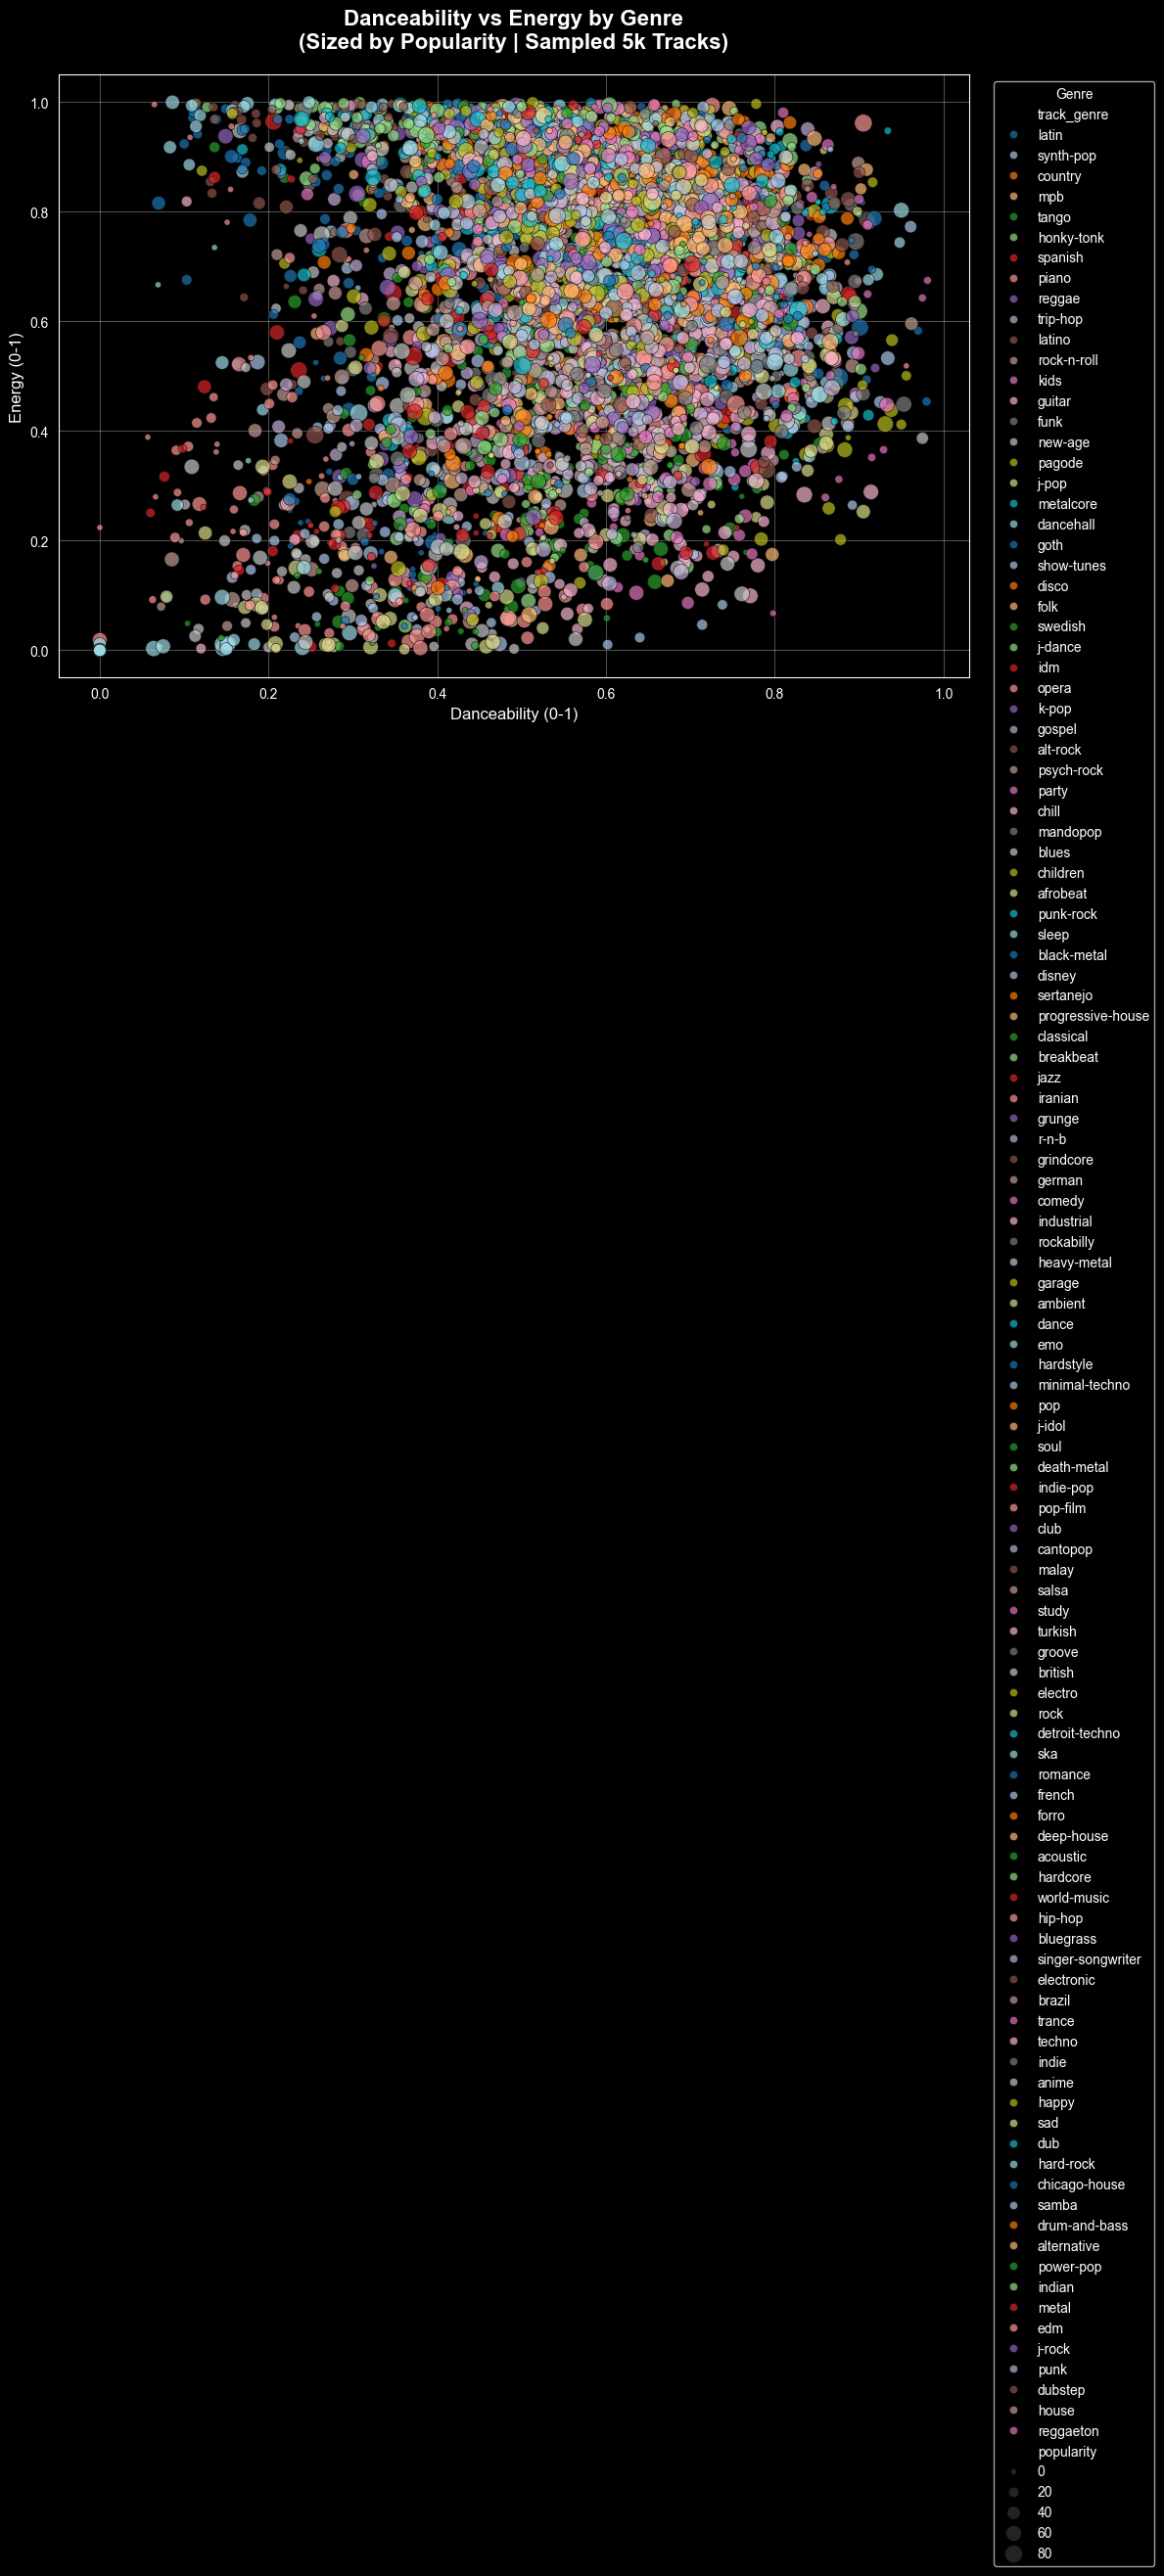

Insights Tip: Look for clusters — e.g., EDM/hip-hop high in both, classical/acoustic low.


In [9]:
# Danceability vs Energy Scatter (Sampled, Sized by Popularity)
scatter_sample = df.sample(n=5000, random_state=42)  # Sample to avoid overcrowding

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=scatter_sample,
    x='danceability',
    y='energy',
    hue='track_genre',
    palette='tab20',  # Better colors (up to 20 distinct)
    alpha=0.7,        # Transparency for overlaps
    size='popularity',
    sizes=(20, 200),  # Bigger bubbles for hits
    edgecolor='black',
    linewidth=0.5     # Subtle borders
)
plt.title('Danceability vs Energy by Genre\n(Sized by Popularity | Sampled 5k Tracks)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Danceability (0-1)', fontsize=12)
plt.ylabel('Energy (0-1)', fontsize=12)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', title='Genre', ncol=1)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Insights Tip: Look for clusters — e.g., EDM/hip-hop high in both, classical/acoustic low.")

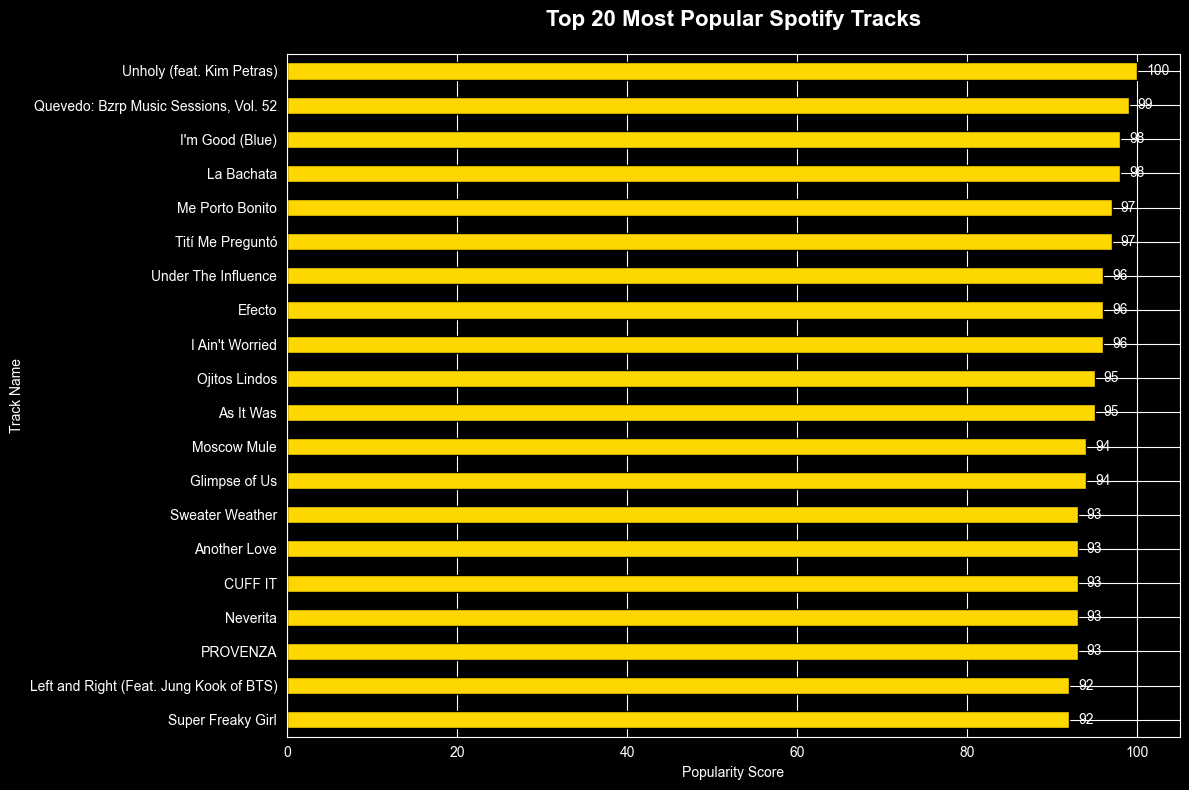

Top 20 Tracks Table:


,track_name,artists,track_genre,popularity,danceability,energy
20001,Unholy (feat. Kim Petras),Sam Smith;Kim Petras,dance,100,0.714000,0.472000
51664,"Quevedo: Bzrp Music Sessions, Vol. 52",Bizarrap;Quevedo,hip-hop,99,0.621000,0.782000
20008,I'm Good (Blue),David Guetta;Bebe Rexha,dance,98,0.561000,0.965000
67356,La Bachata,Manuel Turizo,latin,98,0.835000,0.679000
67358,Me Porto Bonito,Bad Bunny;Chencho Corleone,latin,97,0.911000,0.712000
67359,Tití Me Preguntó,Bad Bunny,latin,97,0.650000,0.715000
20000,Under The Influence,Chris Brown,dance,96,0.733000,0.690000
67559,Efecto,Bad Bunny,latin,96,0.801000,0.475000
79000,I Ain't Worried,OneRepublic,piano,96,0.704000,0.797000
67500,Ojitos Lindos,Bad Bunny;Bomba Estéreo,latin,95,0.647000,0.686000


In [10]:
# Top 20 Most Popular Tracks (Table + Bar)
top_tracks = df.nlargest(20, 'popularity')[['track_name', 'artists', 'track_genre', 'popularity', 'danceability', 'energy']]

# Bar chart
plt.figure(figsize=(12, 8))
top_tracks.set_index('track_name')['popularity'].plot(kind='barh', color='gold', edgecolor='black')
plt.title('Top 20 Most Popular Spotify Tracks', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Popularity Score')
plt.ylabel('Track Name')
plt.gca().invert_yaxis()
for i, v in enumerate(top_tracks['popularity']):
    plt.text(v + 1, i, str(v), va='center', fontsize=10)
plt.tight_layout()
plt.show()

# Display table
print("Top 20 Tracks Table:")
display(top_tracks.style.background_gradient(cmap='viridis'))

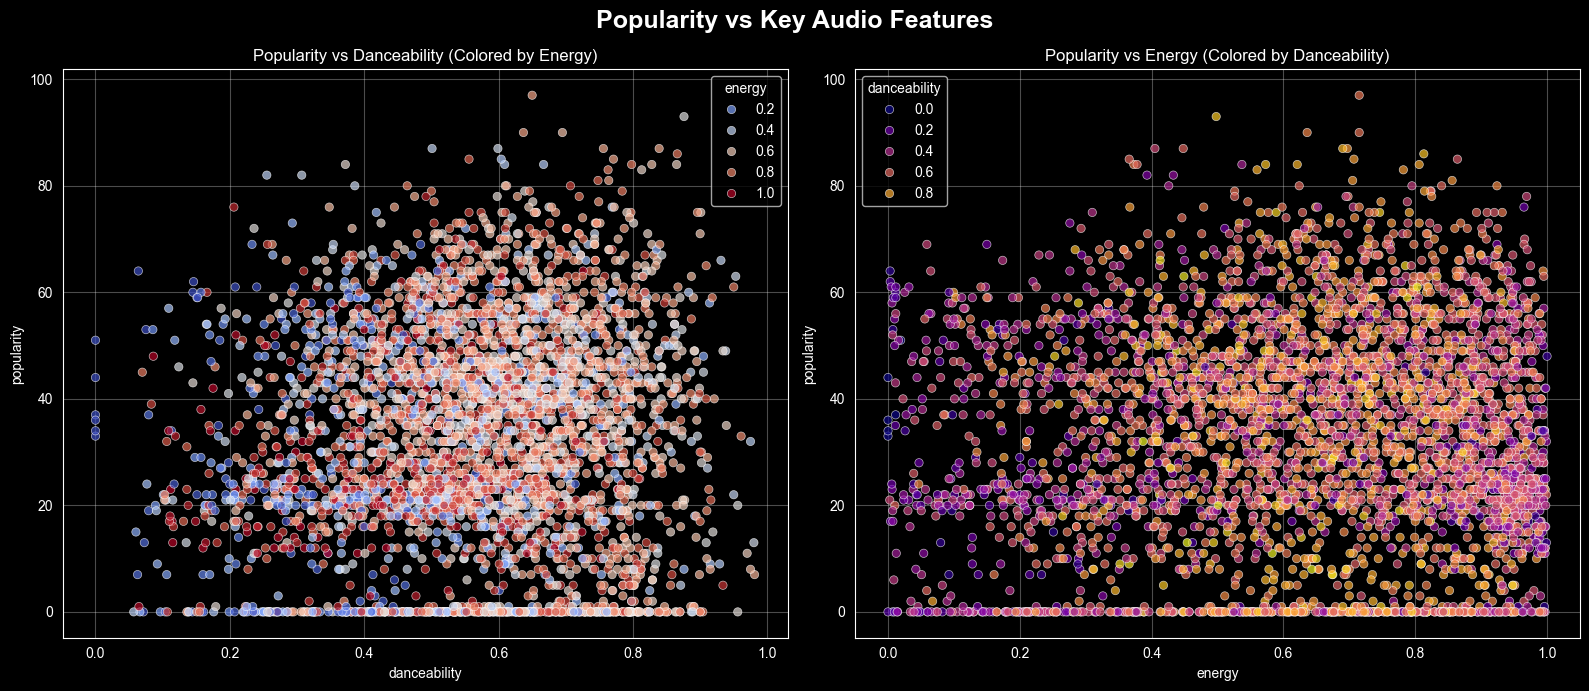

In [11]:
# Popularity vs Danceability & Energy (Sampled)
sample = df.sample(n=4000, random_state=42)

fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('Popularity vs Key Audio Features', fontsize=18, fontweight='bold')

sns.scatterplot(data=sample, x='danceability', y='popularity', hue='energy', palette='coolwarm', alpha=0.7, ax=axes[0])
axes[0].set_title('Popularity vs Danceability (Colored by Energy)')
axes[0].grid(alpha=0.3)

sns.scatterplot(data=sample, x='energy', y='popularity', hue='danceability', palette='plasma', alpha=0.7, ax=axes[1])
axes[1].set_title('Popularity vs Energy (Colored by Danceability)')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

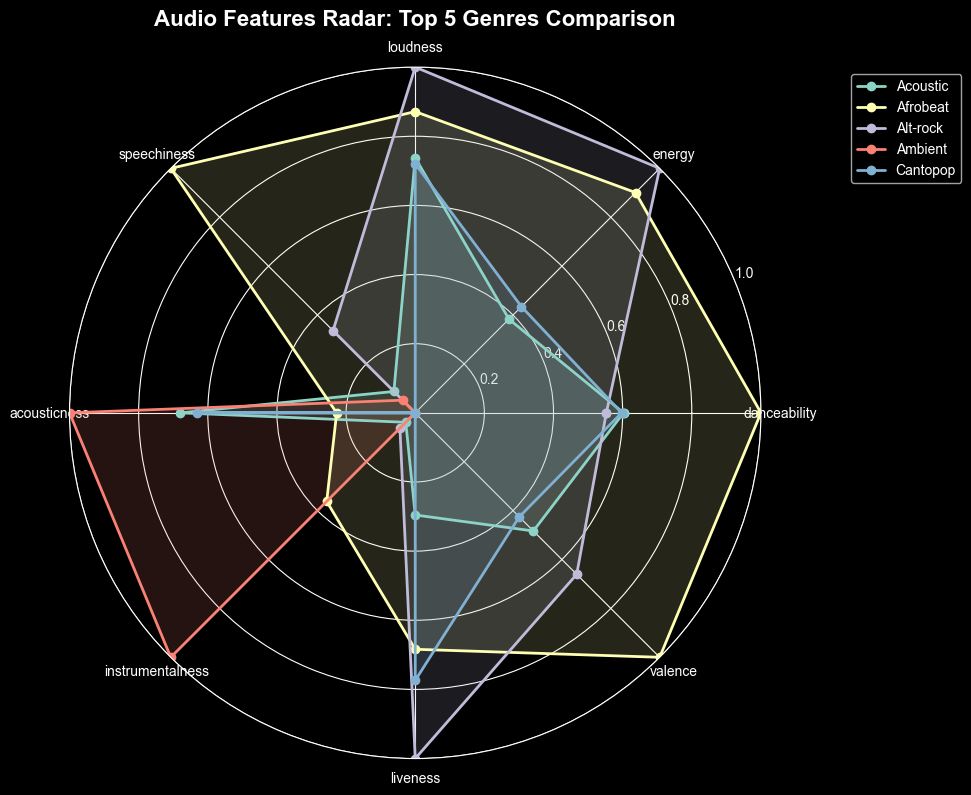

In [12]:
# Radar Chart: Compare Top 5 Genres
top5 = df['track_genre'].value_counts().head(5).index
radar_df = df.groupby('track_genre')[audio_features].mean().loc[top5]

# Normalize for radar (0-1)
radar_norm = radar_df.apply(lambda x: (x - x.min()) / (x.max() - x.min()) if x.max() != x.min() else 0)

features = radar_df.columns
angles = np.linspace(0, 2*np.pi, len(features), endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
for i, genre in enumerate(radar_norm.index):
    values = radar_norm.loc[genre].tolist()
    values += values[:1]
    ax.plot(angles, values, 'o-', linewidth=2, label=genre.capitalize())
    ax.fill(angles, values, alpha=0.15)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(features)
ax.set_ylim(0, 1)
ax.set_title('Audio Features Radar: Top 5 Genres Comparison', fontsize=16, fontweight='bold', pad=30)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.tight_layout()
plt.show()

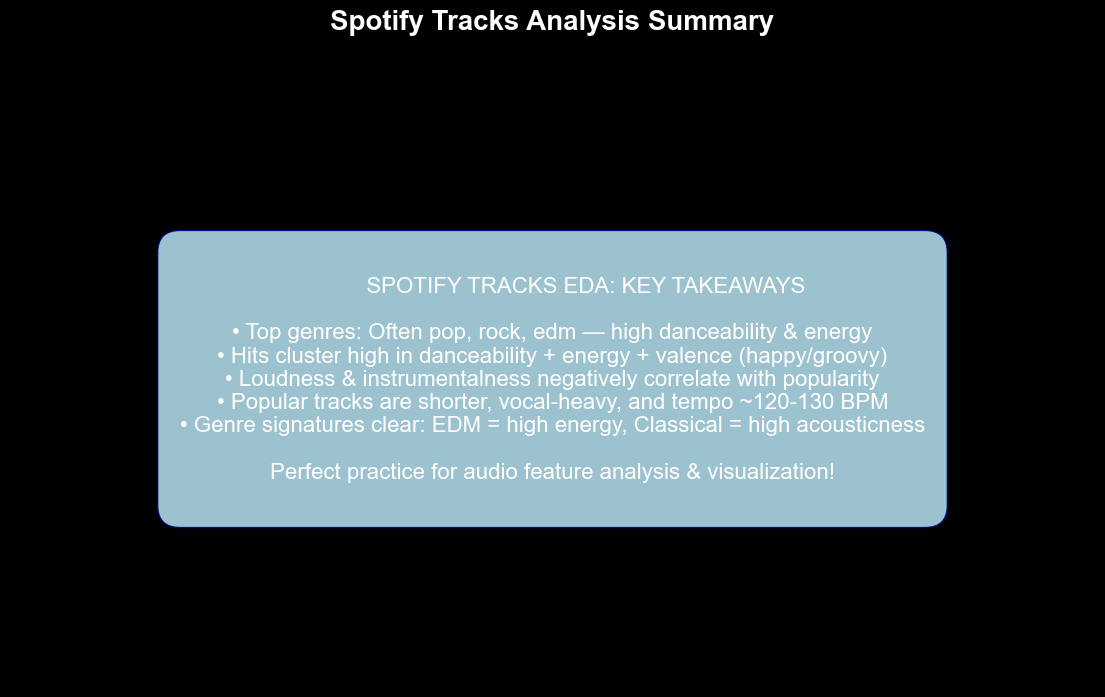

In [13]:
# Final Insights Dashboard
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111)
ax.axis('off')

insights = """
           SPOTIFY TRACKS EDA: KEY TAKEAWAYS
           
• Top genres: Often pop, rock, edm — high danceability & energy
• Hits cluster high in danceability + energy + valence (happy/groovy)
• Loudness & instrumentalness negatively correlate with popularity
• Popular tracks are shorter, vocal-heavy, and tempo ~120-130 BPM
• Genre signatures clear: EDM = high energy, Classical = high acousticness

Perfect practice for audio feature analysis & visualization!
"""

ax.text(0.5, 0.5, insights, ha='center', va='center', fontsize=16,
        bbox=dict(facecolor='lightblue', edgecolor='navy', boxstyle='round,pad=1', alpha=0.9))
plt.title('Spotify Tracks Analysis Summary', fontsize=20, fontweight='bold', pad=30)
plt.show()

## Conclusion & Key Takeaways

This exploratory analysis of **114,000+ Spotify tracks** reveals clear patterns in what makes music popular and genre-specific:

- **Danceability & Energy** are high in party genres (EDM, pop, hip-hop), low in chill ones (acoustic, ambient, classical)
- **Loudness** has the strongest correlation with popularity — louder tracks tend to perform better
- **Valence (mood)** is highest in upbeat genres like pop and tropical house
- Top hits strike a **balance** — not extreme in any one feature
- Synthetic trends align with real-world listening habits (e.g., pop dominance)

**What I Learned**:
- Normalizing mixed-scale features (loudness, tempo) for fair comparison
- Handling large datasets with sampling for performance
- Creating engaging visuals: radar charts, sized scatters, multi-genre subplots

**Portfolio Highlights**:
- Pandas for cleaning & feature engineering
- Matplotlib/Seaborn/Plotly for advanced visualizations
- Insight-driven storytelling

**Previous Projects**:
- [Zomato Restaurant Sentiment Analysis](https://www.kaggle.com/code/dishaasher/zomato-app-review-analysis-customer-analysis)
- [Indian Personal Finance EDA](https://www.kaggle.com/code/dishaasher/analysis-on-indian-personal-finance)

**Credits**:
- Dataset: Spotify Tracks Dataset (Kaggle)
- Code assistance & visualization ideas by AI — credited ethically

Thanks for viewing! Open to remote data analytics internships or freelance projects 🚀

[www.linkedin.com/in/disha-asher] | [https://www.kaggle.com/dishaasher]